In [1]:
try:
    output_filepath
except:
    output_filepath = 's3://workspaces-clarity-mgmt-pro/jaime.oliver/misc/social_capital/data/processed_2/'

In [35]:
import os
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from linearmodels.panel import PanelOLS
import patsy

In [3]:
data_path = os.path.join(output_filepath, 'panel_data.parquet')
df_model = pd.read_parquet(data_path)
centralities = ['authorities', 'hubs', 'pagerank', 'gfi', 'bridging', 'favor']

df_model.dropna(subset = ['log_GFCF', 'log_gdp'], inplace=True)

df_model.eval('gdp_per_capita = gdp/wkn_population', inplace=True)
df_model.eval('productivity = gdp*10**6/(wkn_population**0.3*GFCF**0.7)', inplace=True)

In [36]:
f = f'log_gdp ~ log_GFCF + log_wkn_population + 1'
y, X = patsy.dmatrices(f, df_model.set_index(['country','year']),  return_type='dataframe')
base_model_fe = PanelOLS(y,X, entity_effects=True, time_effects=True)
base_model_fe = base_model_fe.fit()

df_model['residual'] = base_model_fe.resids.values

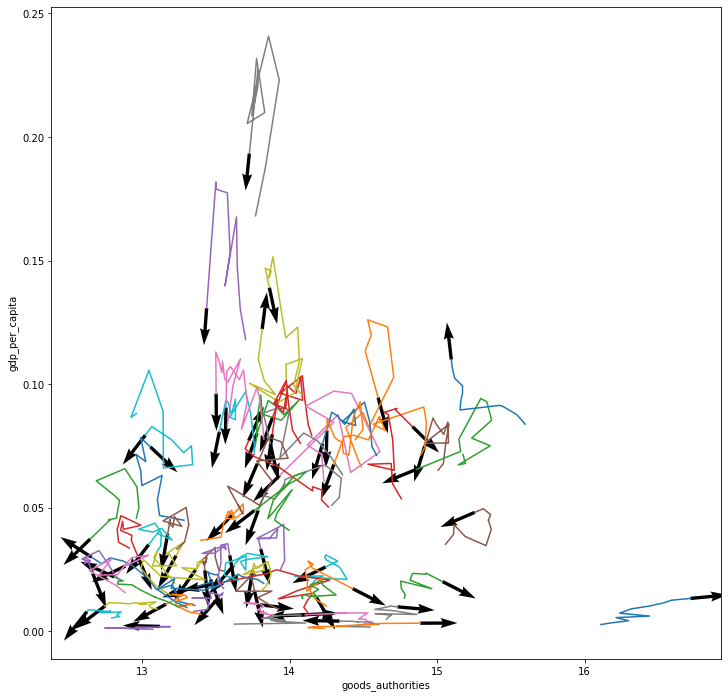

In [38]:
network = 'human'
network = 'financial'
network = 'goods'

centrality = 'hubs'
centrality = 'authorities'
#centrality = 'pagerank'
#centrality = 'favor'
#centrality = 'bridging'
x_var = f'{network}_{centrality}'

y_var = 'productivity'
y_var = 'residual'
y_var = 'gdp_per_capita'
#y_var = 'gdp'
#y_var = f'financial_hubs'

#df_plot['x_velocity'] = df_plot.groupby()

    
fig, ax = plt.subplots(figsize=(12,12))

#ax.set_yscale('symlog')

for country in df_model.country.unique():
    df_plot = df_model[df_model.country == country]
    df_plot =  df_plot[df_plot.year.between(1995, 2016)]
    
    if len(df_plot)<2: continue

    df_plot[x_var] = df_plot[x_var].map(lambda x: np.log1p(x*1.e8))

    x = df_plot[x_var].values
    y = df_plot[y_var].values
    
    u = np.diff(x)
    v = np.diff(y)

    ax.plot(x,y)
    ax.quiver(x[-1], y[-1], u[-1], v[-1],angles='xy', width=0.005)

#plt.legend()
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.show()

<AxesSubplot:xlabel='year'>

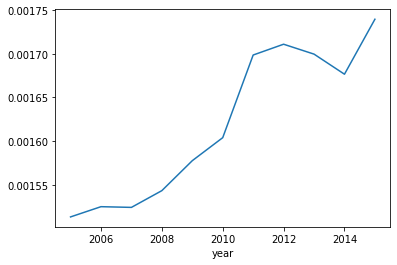

In [9]:
df_model.groupby('year').human_authorities.median().plot()

<AxesSubplot:xlabel='year'>

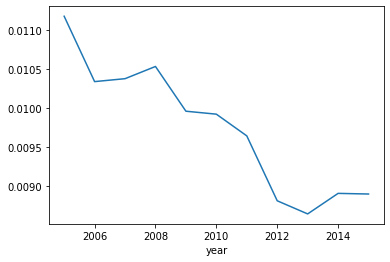

In [10]:
df_model.groupby('year').financial_authorities.median().plot()